# Advanced Regression

## Challenge: Advanced Regression

by: Melissa N 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn import preprocessing

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline
sns.set_style('white')

%matplotlib inline
from IPython.display import display

## DATA CLEANING

In [2]:
# Assign spreadsheet filename to `file`
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
# Load spreadsheet
xl = pd.ExcelFile(file)
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('13tbl8ny')
display(df1.head())

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
#Adjust df1 to exclude 1st 3 rows.
df = df1[3:len(df1)]
#grab the first row for the header set the header row as the df header
df.columns = df.iloc[0]

In [4]:
## Make Columns easier to read 

df.columns = ["City", "Population","Violent_crime","Murder","Rape_revised","Rape_legacy"
                 ,"Robbery","Aggravated_assault","Property_crime","Burglary","Larceny_theft","Motor_vehicle_theft","Arson3"]

In [5]:

df = df[1:]
df.index = range(0,len(df))
# Removing the columns with NAN
df.drop(['Rape_revised','Arson3'], inplace=True, axis=1)
#Adjust df to exclude the last 3 rows
# dropping the row
df = df.iloc[:347]

In [6]:
# convert columns to numeric.
df.loc[:,'Property_crime'] = pd.to_numeric(df.loc[:,'Property_crime'])
df.loc[:,'Population'] = pd.to_numeric(df.loc[:,'Population'])
df.loc[:,'Violent_crime'] = pd.to_numeric(df.loc[:,'Violent_crime'])
df.loc[:,'Murder'] = pd.to_numeric(df.loc[:,'Murder'])
df.loc[:,'Rape_legacy'] = pd.to_numeric(df.loc[:,'Rape_legacy'])
df.loc[:,'Aggravated_assault'] = pd.to_numeric(df.loc[:,'Aggravated_assault'])
df.loc[:,'Burglary'] = pd.to_numeric(df.loc[:,'Burglary'])
df.loc[:,'Larceny_theft'] = pd.to_numeric(df.loc[:,'Larceny_theft'])
df.loc[:,'Motor_vehicle_theft'] = pd.to_numeric(df.loc[:,'Motor_vehicle_theft'])
df.loc[:,'Robbery'] = pd.to_numeric(df.loc[:,'Robbery'])

In [7]:
display(df.head())

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


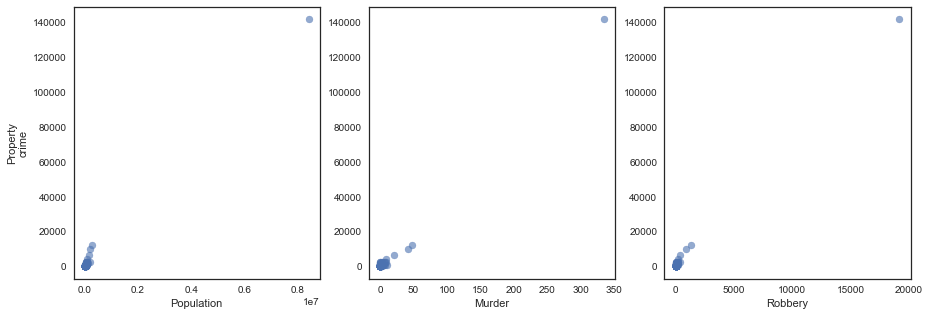

In [8]:
# Look at the scatter plot for Population, Murder and Robbery


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property\ncrime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

Looking at this scatter plot, we can see that there is a lot of outliers. 
One of them occurs where Property and crime is 140,000. So we will try to remove that and other outliers that we may see. 

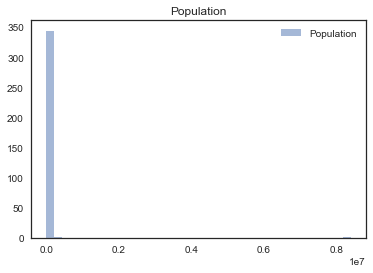

In [9]:
# Look at the histogram of populations"

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

This histogram doesn't tell us anything. 
Hopefully will be helpful or better once we have remove the outliers. 

In [10]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df.loc[((df['Murder'] > 0) & (df['Population'] > 100000))] )

print(len(df[df['Murder'] > 0]))
print(len(df[df['Murder'] == 0]))

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


49
298


In [11]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Property_crime'] > 3000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394


In [12]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


In [13]:
## Drop the rows that seem to contain outliers for Property and crime 
#df.drop(df.index[[7,3,35,216,272,310,346]], inplace=True, axis=0)
## Drop the rows that seem to contain outliers for Property and crime 
#df.drop(df.index[[216]], inplace=True, axis=0)

display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


We will just remove New York City, because it is a highly populated city and thus create the outlier inn our data.

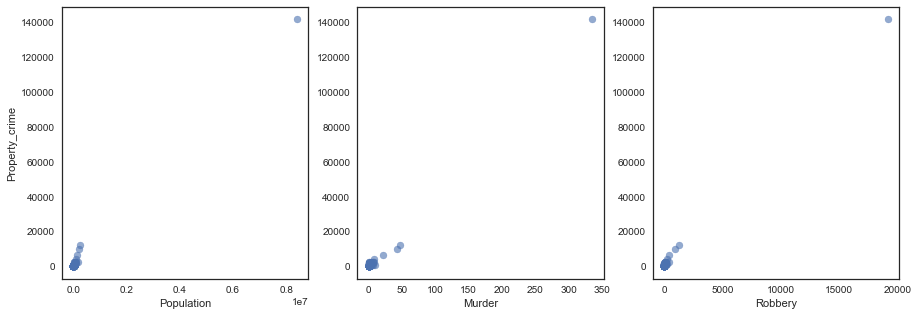

In [14]:
# Look at the scatter plot for Population, Murder and Robbery with cleaned data 

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property_crime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

The scatter plots looks better.     
We can clearly see that there is a lot of information for City with Property Crime less that 1000 and Population around 50,000.    
For Murder and nonnegligent manslaugther most of them are in place where there is 2 or less occurences.   
For Robbery it looks like most of them occure where there is a 50 or less occurences.  

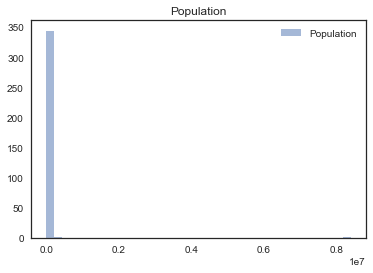

In [15]:
# Look at the histogram of population with clean data 

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

In [16]:
# Making dummies.
# Also creating a data frame to hold our features.
features_13 = df
display(features_13.head())

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


## Feature Engineering

In [17]:
###Make Everything per capita by dividing other columns by population
### features per capita

df_f = df[['Violent_crime', 'Murder', 'Rape_legacy',
       'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft']].div(df.Population, axis=0)

In [18]:
## Multiply all rows by a 1,000

df_f.ix[:,~np.in1d(df_f.dtypes,['object','datetime'])] *= 1000

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_f.columns

Index(['Violent_crime', 'Murder', 'Rape_legacy', 'Robbery',
       'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Motor_vehicle_theft'],
      dtype='object')

In [20]:
df.shape[0]

347

In [21]:
## Make a binary outcome b/c of Logistic Regression
df_f['Property_crime_high'] = np.where(df_f['Property_crime']>15, 1, 0)

Y = df_f['Property_crime_high']
X = df_f.loc[:, ~(df_f.columns).isin(['Property_crime_high','Property_crime'])]

In [22]:
# Define the training and test sizes.
trainsize = int(df_f.shape[0] / 2)
df_test = df_f.iloc[trainsize:, :].copy()
df_train = df_f.iloc[:trainsize, :].copy()

In [23]:
display(df_train.head())

,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Property_crime_high
0,0.000000,0.000000,0.000000,0.000000,0.000000,6.448146,1.074691,5.373455,0.000000,0
1,1.164144,0.000000,0.000000,0.000000,1.164144,9.313155,1.164144,7.760962,0.388048,0
2,1.054111,0.000000,0.000000,0.000000,1.054111,5.621926,0.351370,5.270555,0.000000,0
3,8.075054,0.081669,0.306260,2.317367,5.369758,41.753440,7.197109,33.106701,1.449630,1
4,3.600501,0.000000,0.469631,0.626174,2.504696,34.909205,8.296807,25.829681,0.782718,1


In [24]:
display(df_test.head())


,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Property_crime_high
173,0.865426,0.0,0.000000,0.432713,0.432713,19.904803,2.596279,16.875811,0.432713,1
174,0.000000,0.0,0.000000,0.000000,0.000000,4.887320,0.543036,4.344285,0.000000,0
175,0.558088,0.0,0.000000,0.000000,0.558088,10.975723,1.860292,8.836387,0.279044,0
176,3.348641,0.0,0.287026,1.148106,1.913509,31.046690,5.740528,25.019135,0.287026,1
177,1.043717,0.0,0.029820,0.387666,0.626230,10.049502,1.252460,8.260273,0.536769,0


In [25]:
# Set up the regression model to predict defaults using all other
# variables as features.

Y_train = df_train['Property_crime_high'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Property_crime_high','Property_crime'])]


# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['Burglary_Larceny'] = df_train['Burglary'] * df_train['Larceny_theft']
df_train['Burglary_Motor'] = df_train['Burglary'] * df_train['Motor_vehicle_theft']
df_train['Larceny_Motor'] = df_train['Larceny_theft'] * df_train['Motor_vehicle_theft']
df_train['Burglary_sqrt'] = (df_train['Burglary'] + 100) ** .5
df_train['Burglary2'] = (df_train['Burglary'] + 100) ** 2
df_train['Burglary3'] = (df_train['Burglary'] + 100) ** 3


# Re-run the model with the new features.
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['Property_crime_high','Property_crime'])]


In [26]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['Property_crime_high'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['Property_crime_high','Property_crime'])]


# Test the more complex model with larger coefficients.
df_test['Burglary_Larceny'] = df_test['Burglary'] * df_test['Larceny_theft']
df_test['Burglary_Motor'] = df_test['Burglary'] * df_test['Motor_vehicle_theft']
df_test['Larceny_Motor'] = df_test['Larceny_theft'] * df_test['Motor_vehicle_theft']
df_test['Burglary_sqrt'] = (df_test['Burglary'] + 100) ** .5
df_test['Burglary2'] = (df_test['Burglary'] + 100) ** 2
df_test['Burglary3'] = (df_test['Burglary'] + 100) ** 3

# Re-run the model with the new features.
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['Property_crime_high','Property_crime'])]


In [27]:
X_train.columns

Index(['Violent_crime', 'Murder', 'Rape_legacy', 'Robbery',
       'Aggravated_assault', 'Burglary', 'Larceny_theft',
       'Motor_vehicle_theft'],
      dtype='object')

## Vanilla Logistic Regression 

In [28]:
logregr = LogisticRegression(C=1e9)
logregr.fit(X_train, Y_train)
print('R² for the model with few features:')
print(logregr.score(X_train, Y_train))

logregrBig = LogisticRegression(C=1e9)
logregrBig.fit(X_train2, Y_train)
print('R² for the model with lot of features:')
print(logregrBig.score(X_train2, Y_train))

R² for the model with few features:
1.0
R² for the model with lot of features:
0.976878612717


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Make predictions.
y_logregrpred = logregr.predict(X_train)
y_logregrBigpred = logregrBig.predict(X_train2)

In [30]:
print('R² for the model with with few features on Test set:')
print(logregr.score(X_test, Y_test))

print('\nR² for the model with with lot of  features on Test set:')
print(logregrBig.score(X_test2, Y_test))

R² for the model with with few features on Test set:
0.98275862069

R² for the model with with lot of  features on Test set:
0.977011494253


In [31]:
print('Classification matrix with a few features')
print(classification_report(Y_train, y_logregrpred))

Classification matrix with a few features
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        83
          1       1.00      1.00      1.00        90

avg / total       1.00      1.00      1.00       173



In [32]:
print('With a few features')
print(pd.crosstab(y_logregrpred, df_train['Property_crime_high']))

With a few features
Property_crime_high   0   1
row_0                      
0                    83   0
1                     0  90


In [33]:
print('Classification matrix with lots of features')
print(classification_report(Y_train, y_logregrBigpred))

Classification matrix with lots of features
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        83
          1       1.00      0.96      0.98        90

avg / total       0.98      0.98      0.98       173



In [34]:
print('With lots of features')
print(pd.crosstab(y_logregrBigpred, df_train['Property_crime_high']))

With lots of features
Property_crime_high   0   1
row_0                      
0                    83   4
1                     0  86


In [35]:
print('Scores with a few features: ', cross_val_score(logregr, X, Y, cv=5))

print('\nAverage Score with a few features: ', cross_val_score(logregr, X, Y, cv=5).mean())

Scores with a few features:  [ 1.          0.98550725  0.97101449  1.          1.        ]

Average Score with a few features:  0.991304347826


In [36]:
print('Scores with lots of features: ', cross_val_score(logregrBig, X, Y, cv=5))

print('\nAverage Score with lots of features: ', cross_val_score(logregrBig, X, Y, cv=5).mean())

Scores with lots of features:  [ 1.          0.98550725  0.97101449  1.          1.        ]

Average Score with lots of features:  0.991304347826


## Ridge logistic regression

In [37]:
# Small number of parameters.
#ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr = LogisticRegression(penalty='l2')
ridgeregr.fit(X_train, Y_train)
print('R² for the model with few features:')
print(ridgeregr.score(X_train, Y_train))


# Large number of parameters.
#ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig = LogisticRegression(penalty='l2')
ridgeregrBig.fit(X_train2, Y_train)
print('R² for the model with lot of features:')
print(ridgeregrBig.score(X_train2, Y_train))



R² for the model with few features:
0.982658959538
R² for the model with lot of features:
0.976878612717


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# saving model predictions
y_ridgepred = ridgeregr.predict(X_train)
y_ridgeBigpred = ridgeregrBig.predict(X_train2)

In [39]:
print('R² for the model with with few features on Test set:')
print(ridgeregr.score(X_test, Y_test))

print('\nR² for the model with with lot of  features on Test set:')
print(ridgeregrBig.score(X_test2, Y_test))

R² for the model with with few features on Test set:
0.988505747126

R² for the model with with lot of  features on Test set:
0.977011494253


In [40]:
print('Classification matrix with a few features')

print(classification_report(Y_train, y_ridgepred))

Classification matrix with a few features
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        83
          1       0.97      1.00      0.98        90

avg / total       0.98      0.98      0.98       173



In [41]:
print('With a few features')
print(pd.crosstab(y_ridgepred, df_train['Property_crime_high']))

With a few features
Property_crime_high   0   1
row_0                      
0                    80   0
1                     3  90


In [42]:
print('Classification matrix with lots of features')
print(classification_report(Y_train, y_ridgeBigpred))

Classification matrix with lots of features
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        83
          1       1.00      0.96      0.98        90

avg / total       0.98      0.98      0.98       173



In [43]:
print('With lots of features')
print(pd.crosstab(y_ridgeBigpred, df_train['Property_crime_high']))

With lots of features
Property_crime_high   0   1
row_0                      
0                    83   4
1                     0  86


In [44]:
print('Scores with a few features: ', cross_val_score(ridgeregr, X, Y, cv=5))

print('\nAverage Score with a few features: ', cross_val_score(ridgeregr, X, Y, cv=5).mean())

Scores with a few features:  [ 0.98591549  0.98550725  0.97101449  1.          0.98550725]

Average Score with a few features:  0.985588895693


In [45]:
print('Scores with lots of features: ', cross_val_score(ridgeregrBig, X, Y, cv=5))

print('\nAverage Score with lots of features: ', cross_val_score(ridgeregrBig, X, Y, cv=5).mean())

Scores with lots of features:  [ 0.98591549  0.98550725  0.97101449  1.          0.98550725]

Average Score with lots of features:  0.985588895693


## Lasso logistic regression

In [46]:
# Small number of parameters.
#lass = linear_model.Lasso(alpha=.35)
lass = LogisticRegression(penalty='l1')
lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))



# Large number of parameters.
#lassBig = linear_model.Lasso(alpha=.35)
lassBig = LogisticRegression(penalty='l1')
lassBig.fit(X_train2, Y_train)
print('R² for the model with lot of  features:')
print(lassBig.score(X_train2, Y_train))


R² for the model with few features:
0.994219653179
R² for the model with lot of  features:
0.988439306358


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# saving model predictions
y_lasspred = lass.predict(X_train)
y_lassBigpred = lassBig.predict(X_train2)

In [48]:
print('R² for the model with few features on Test set:')
print(lass.score(X_test, Y_test))

print('\nR² for the model with with lot of  features on Test set:')
print(lassBig.score(X_test2, Y_test))

R² for the model with few features on Test set:
1.0

R² for the model with with lot of  features on Test set:
0.994252873563


In [49]:
print('Classification matrix with a few features')
print(classification_report(Y_train, y_lasspred))

Classification matrix with a few features
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        83
          1       0.99      1.00      0.99        90

avg / total       0.99      0.99      0.99       173



In [50]:
print('With a few features')
print(pd.crosstab(y_lasspred, df_train['Property_crime_high']))

With a few features
Property_crime_high   0   1
row_0                      
0                    82   0
1                     1  90


In [51]:
print('Classification matrix  report with lots of features')
print(classification_report(Y_train, y_lassBigpred))

Classification matrix  report with lots of features
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        83
          1       0.99      0.99      0.99        90

avg / total       0.99      0.99      0.99       173



In [52]:
print('With lots of features')
print(pd.crosstab(y_lassBigpred, df_train['Property_crime_high']))

With lots of features
Property_crime_high   0   1
row_0                      
0                    82   1
1                     1  89


In [53]:
print('Scores with few features: ', cross_val_score(lass , X, Y, cv=5))
print('\nAverage Score with few features: ', cross_val_score(lass , X, Y, cv=5).mean())

Scores with few features:  [ 0.98591549  0.98550725  0.98550725  1.          1.        ]

Average Score with few features:  0.991385997142


In [54]:
print('Scores with lots of features: ', cross_val_score(lassBig , X, Y, cv=5))
print('\nAverage Score with lots of features: ', cross_val_score(lassBig , X, Y, cv=5).mean())

Scores with lots of features:  [ 0.98591549  0.98550725  0.98550725  1.          1.        ]

Average Score with lots of features:  0.991385997142


In [55]:
##TRy to change propeorty crime cut off 16 is possibly to high  try with 5 and 30 and so forth 
## Doing sensitivity analysis of the model
## changing alpha for Lasso and/or Ridge

## Look into the things that you need to do to have different results for the model

### Look at what happens when we use Look at Big Model meaning using X_train2


## For df_f['Property_crime_high'] = np.where(df_f['Property_crime']>5, 1, 0)


### __For Vanilla Logistic Regression__   

__R² for the model with few features:__    
1.0     
__R² for the model with lot of features:__      
0.895953757225      

__R² for the model with with few features on Test set:__      
1.0   
__R² for the model with with lot of  features on Test set:__     
0.919540229885 

__With a few features__        
Property_crime_high   0    1    
row_0                        
0                    19    0        
1                     0  154  


__With lots of features__   
Property_crime_high   0    1   
row_0                          
0                     6    5     
1                    13  149      
    
### __For Ridge Logistic Regression__   

__R² for the model with few features:__   
0.982658959538   
__R² for the model with lot of features:__   
0.895953757225   

__R² for the model with with few features on Test set:__  
0.959770114943     

__R² for the model with with lot of  features on Test set:__   
0.919540229885    

__With a few features__      
Property_crime_high   0   1   
row_0                      
0                    16    0    
1                     3  154        

__With lots of features__     
Property_crime_high   0   1   
row_0                      
0                     6    5    
1                    13  149         


### __For Lasso Logistic Rgeression__  


__R² for the model with few features:__   
0.988439306358   
__R² for the model with lot of  features:__
1.0   

__R² for the model with few features on Test set:__  
0.988505747126   

__R² for the model with with lot of  features on Test set:__  
0.994252873563   


__With a few features__  
Property_crime_high   0    1  
row_0                           
0                    17    0     
1                     2  154       


__With lots of features__   
Property_crime_high   0    1   
row_0                          
0                    19    0     
1                     0  154      



__Vanilla Logistic Regression__ gives us a correct estimate when we have a few features  and give us some error when we are dealing with a lot of features. 

__Ridge Logistic Regression__ doesn't give us an accurate prediction whether we are dealing with few features or lots of features.   

__Lasso Logistic Regression__ doesn't give us an accurate prediction when we have a few features but works well when we have lots of features.    



## For df_f['Property_crime_high'] = np.where(df_f['Property_crime']>15, 1, 0)


### __For Vanilla Logistic Regression__   

__R² for the model with few features:__    
1.0     
__R² for the model with lot of features:__      
0.976878612717        

__R² for the model with with few features on Test set:__      
0.98275862069   
__R² for the model with with lot of  features on Test set:__     
0.977011494253    



__With a few features__        
Property_crime_high   0    1      
row_0                          
0                    83   0  
1                     0  90  


__With lots of features__     
Property_crime_high   0    1     
row_0                          
0                    83   4  
1                     0  86        
  
### __For Ridge Logistic Regression__   

__R² for the model with few features:__   
0.982658959538 
__R² for the model with lot of features:__   
0.976878612717   

__R² for the model with with few features on Test set:__  
0.988505747126     

__R² for the model with with lot of  features on Test set:__   
0.977011494253     

__With a few features__      
Property_crime_high   0   1   
row_0                      
0                    80   0   
1                     3  90       

__With lots of features__     
Property_crime_high   0   1   
row_0                      
0                    83   4   
1                     0  86         


### __For Lasso Logistic Rgeression__  


__R² for the model with few features:__   
0.994219653179   
__R² for the model with lot of  features:__
0.988439306358  

__R² for the model with few features on Test set:__  
1.0     

__R² for the model with with lot of  features on Test set:__  
0.994252873563   


__With a few features__  
Property_crime_high   0    1  
row_0                           
0                    82   0    
1                     1  90         


__With lots of features__   
Property_crime_high   0    1   
row_0                          
0                    82   1    
1                     1  89      


__Vanilla Logistic Regression__ gives us a correct estimate when we have a few features and give us some error when we are dealing with a lot of features. 

__Ridge Logistic Regression__ doesn't give us an accurate prediction whether we are dealing with few features or lots of features.   

__Lasso Logistic Regression__ doesn't give us an accurate prediction when we have a few or have lots of features.



## For df_f['Property_crime_high'] = np.where(df_f['Property_crime']>30, 1, 0)


### __For Vanilla Logistic Regression__   

__R² for the model with few features:__    
1.0     
__R² for the model with lot of features:__      
0.959537572254    

__R² for the model with with few features on Test set:__      
0.971264367816
__R² for the model with with lot of  features on Test set:__     
0.942528735632 


__With a few features__        
Property_crime_high   0    1    
row_0                        
0                    142   0  
1                      0  31   


__With lots of features__   
Property_crime_high   0    1   
row_0                                                
0                    141   6   
1                      1  25      
  
### __For Ridge Logistic Regression__   

__R² for the model with few features:__   
0.988439306358   
__R² for the model with lot of features:__   
0.959537572254   


__R² for the model with with few features on Test set:__  
0.977011494253      

__R² for the model with with lot of  features on Test set:__   
0.942528735632      


__With a few features__      
Property_crime_high   0   1   
row_0                      
0                    16    0  
1                     3  154       

__With lots of features__     
Property_crime_high   0   1   
row_0                      
0                     6    5  
1                    13  149      


### __For Lasso Logistic Rgeression__  


__R² for the model with few features:__   
0.994219653179      
__R² for the model with lot of  features:__
0.994219653179     



__R² for the model with few features on Test set:__  
0.994252873563   

__R² for the model with with lot of  features on Test set:__  
0.994252873563    


__With a few features__  
Property_crime_high   0    1  
row_0                           
0                    142   1  
1                      0  30       


__With lots of features__   
Property_crime_high   0    1   
row_0                          
0                    142   1  
1                      0  30     


__Vanilla Logistic Regression__ gives us a correct estimate when we have a few features  and give us some error when we are dealing with a lot of features. 

__Ridge Logistic Regression__ doesn't give us an accurate prediction whether we are dealing with few features or lots of features. The prediction with a few features is better than the ones with lots of features.    

__Lasso Logistic Regression__ doesn't give us an accurate prediction when we have a few features but works well when we have lots of features. It looks like the prediction with a few and lots of features is exactly the same.  

We can say that Vanilla Logistic Reegression is definetely better than Ridge and Lasso Logistic Regressions.  
When comparing Ridge and Lasso Regressions, Ridge Regressions seems to work better.   